In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
names_prods = ['Saving Accounts', 'Guarantees', 'Current Accounts', 'Derivada Account', 'Payroll Account', 'Junior Account',
               'Más particular Account', 'Particular Account', 'Particular Plus Account', 'Short-term deposits',
               'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds', 'Mortgage', 'Pensions', 'Loans', 'Taxes',
               'Credit Card', 'Securities', 'Home Account', 'Payroll', 'Pensions', 'Direct Debit']

### Carga de datos de entrenamiento y test

In [4]:
%%time
df = pd.read_csv('data/train_ver2.csv',
                 dtype={'sexo': str, 'age': str, 'ind_nuevo': str, 'indrel_1mes': str, 
                        'antiguedad': str, 'ult_fec_cli_lt': str, 'indext': str, 'conyuemp': str},
                 parse_dates=['fecha_dato', 'fecha_alta'])
df.head()

CPU times: user 1min 14s, sys: 5.15 s, total: 1min 19s
Wall time: 1min 19s


In [5]:
%%time
df_test = pd.read_csv('data/test_ver2.csv',
                 dtype={'sexo': str, 'age': str, 'ind_nuevo': str, 'indrel_1mes': str, 
                        'antiguedad': str, 'ult_fec_cli_lt': str, 'indext': str, 'conyuemp': str},
                 parse_dates=['fecha_dato', 'fecha_alta'])
df_test.head()

CPU times: user 4.05 s, sys: 44 ms, total: 4.09 s
Wall time: 4.11 s


In [6]:
df.shape, df_test.shape

((13647309, 48), (929615, 24))

### Exploración de productos por mes

In [7]:
products = df.loc[:, ['fecha_dato']].join(df.loc[:, 'ind_ahor_fin_ult1':])

In [8]:
products.shape

(13647309, 25)

##### Cantidad de productos cada mes

In [9]:
df_a = products.groupby(['fecha_dato']).sum()

In [10]:
df_a.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-01-28,88,19,487855,301,58763,7757,8418,106471,36195,1513,...,5007,7430,2349,38288,35613,20263,3234,38995.0,43331.0,95601
2015-02-28,89,20,488658,301,60028,7690,8228,106043,36040,2055,...,4998,7407,2344,38507,34352,20198,3219,40746.0,44810.0,94543
2015-03-28,89,21,489074,315,60929,7674,7875,105688,35847,2396,...,4988,7384,2340,38727,34990,20020,3196,42967.0,44109.0,97211
2015-04-28,87,21,489069,313,62221,7653,7482,105167,35650,2439,...,4968,7370,2346,39603,35988,19939,3173,42443.0,46593.0,98312
2015-05-28,85,21,489737,313,63391,7647,7096,104947,35499,2075,...,4797,7363,2342,39946,35880,19955,3155,41383.0,42458.0,96487


In [11]:
#Descripción de los productos
descr_prods = {}
for i, p in enumerate(names_prods):
    descr_prods[df_a.columns.tolist()[i]] = { 'num': str(i), 'name': p }

In [12]:
dates = [d.strftime("%b %Y") for d in df_a.index]

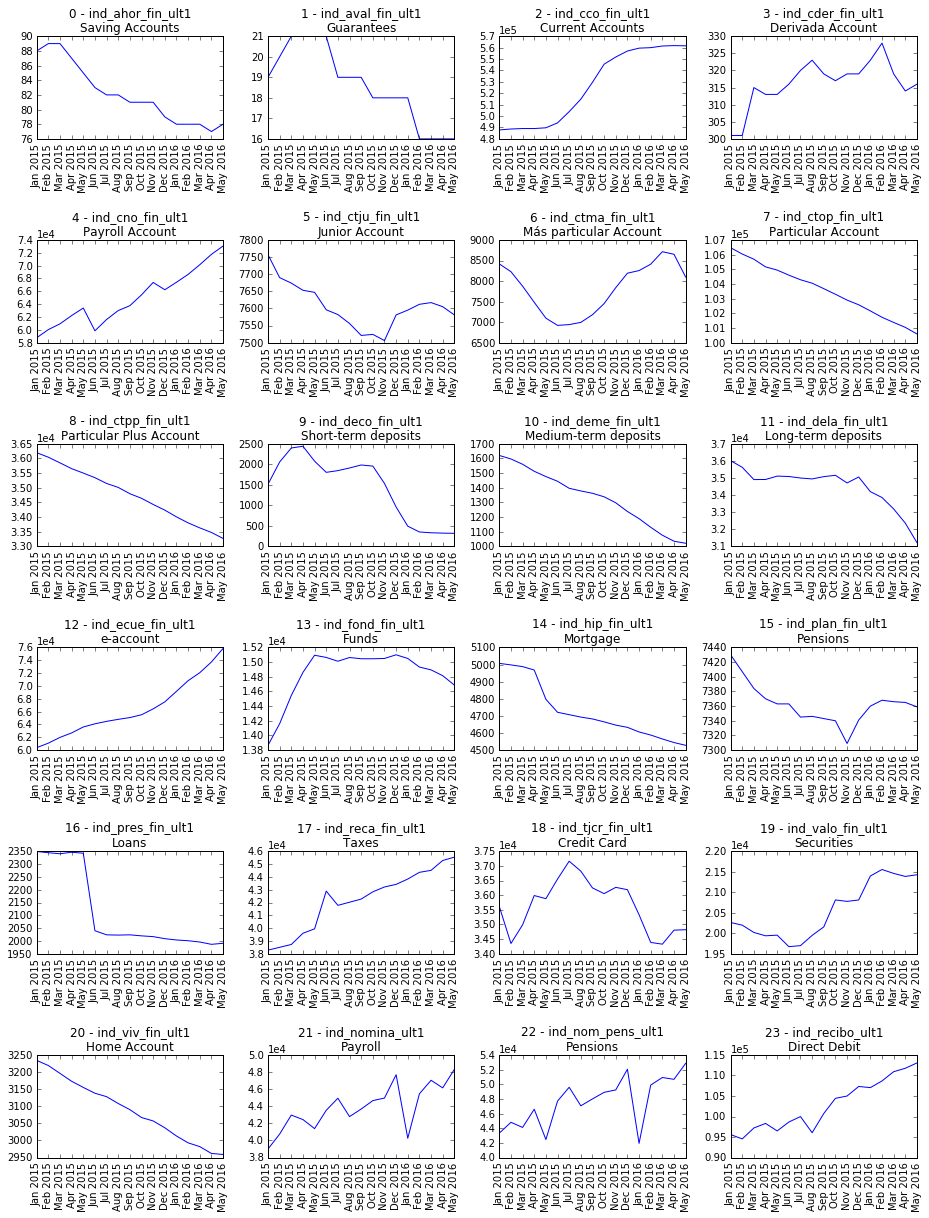

In [13]:
fig, axes = plt.subplots(6, 4, sharex=False, figsize=(13, 17))
axs = [j for i in axes for j in i]
for i, col in enumerate(df_a.columns):
    serie = df_a.loc[:, col]
    ax = axs[i]
    ax.plot(serie.values)
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'])
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=90)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=2)

### Compras y "abandonos" de productos por mes
En esta sección se mira el comportamiento de compra y abandono de cada producto por mes

In [14]:
df_b = pd.DataFrame(columns=df_a.columns.tolist()[0:]) #dataframe products prev bought
for i in range(1, len(dates)):
    prev_prods = df_a.loc[df_a.index[i-1]].as_matrix()
    act_prods = df_a.loc[df_a.index[i]].as_matrix()
    bought_prods = act_prods - prev_prods
    df_b.loc[i] = bought_prods

In [15]:
df_b = df_a.reset_index().loc[:, ['fecha_dato']].join(df_b).iloc[1:]
df_b = df_b.set_index('fecha_dato')

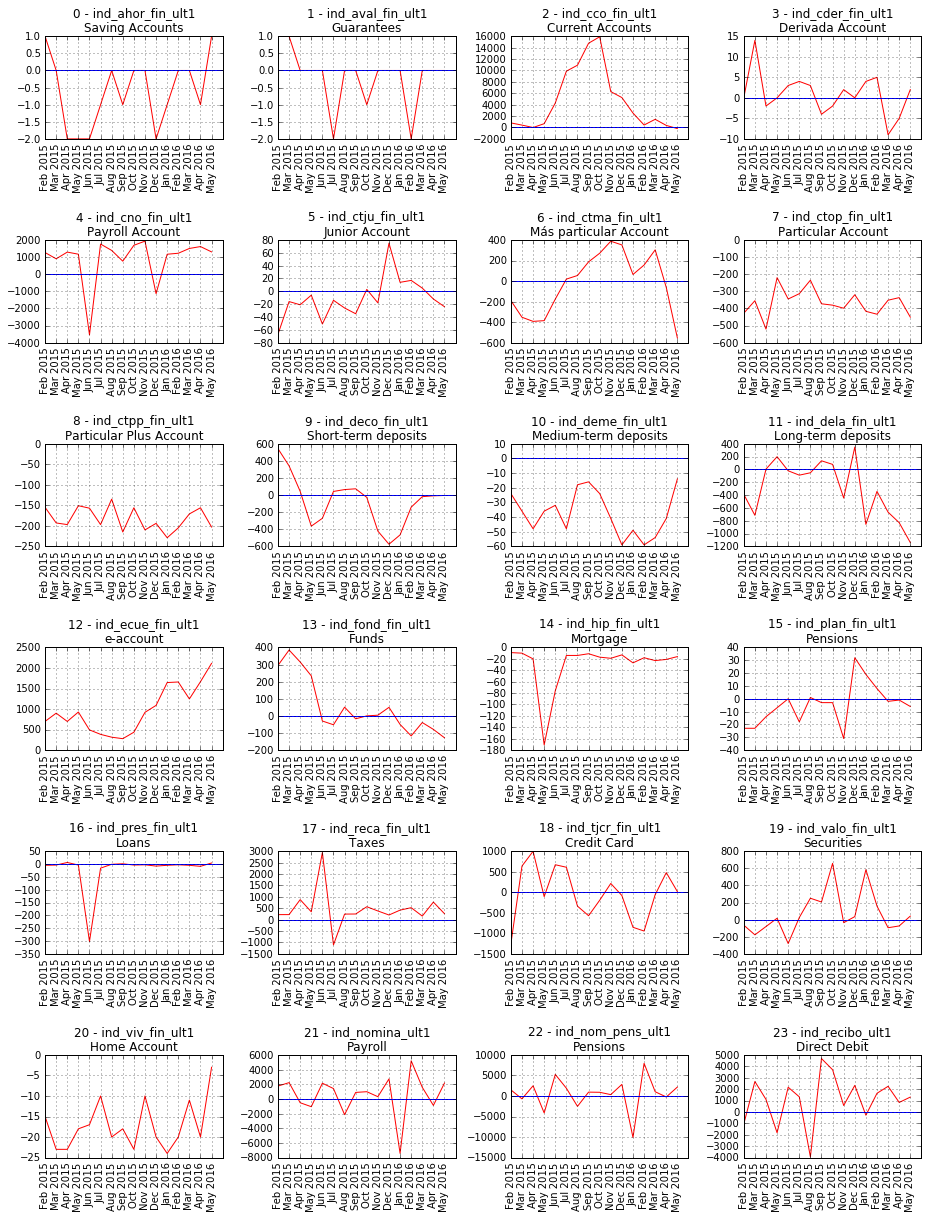

In [22]:
fig, axes = plt.subplots(6, 4, sharex=False, figsize=(13, 17))
axs = [j for i in axes for j in i]
for i, col in enumerate(df_b.columns):
    serie = df_b.loc[:, col]
    ax = axs[i]
    ax.plot(serie.values, c='r')
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'])
    ax.set_xticks(range(len(dates[1:])))
    ax.set_xticklabels(dates[1:], rotation=90)
    ax.axhline()
    ax.grid()
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=2)

In [36]:
top_products = [i for i in reversed(df_a.mean().sort_values()[-8:].index)]

In [33]:
len(axs)

8

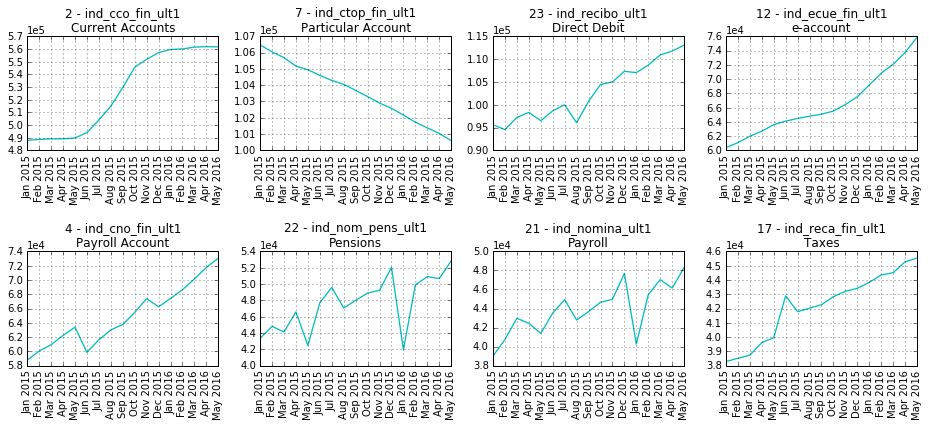

In [37]:
fig, axes = plt.subplots(2, 4, sharex=False, figsize=(13, 6))
axs = [j for i in axes for j in i]
for i, col in enumerate(top_products):
    serie = df_a.loc[:, col]
    ax = axs[i]
    ax.plot(serie.values, linewidth=1.3, c='c')
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'])
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=90)
    #ax.axhline()
    ax.grid()
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=2)

In [460]:
df_a.loc[df.fecha_dato.value_counts().index[0], 'ind_cco_fin_ult1'] / df.fecha_dato.value_counts()[0]

0.60294507613373949